## Introduction
---
- We have a dataset containing information about students and their performance in school and exams.
- The goal is to predict students' grades (field `GradeClass`) based on their features.
  
- Our dataset contains:
    - StudentID: A unique identifier assigned to each student (1001 to 3392).
    - Age: The age of the students ranges from 15 to 18 years.
    - Gender: Gender of the students, where 0 represents Male and 1 represents Female.
    - Ethnicity: The ethnicity of the students, coded as follows:
        - 0: Caucasian
        - 1: African American
        - 2: Asian
        - 3: Other
    - ParentalEducation: The education level of the parents, coded as follows:
        - 0: None
        - 1: High School
        - 2: Some College
        - 3: Bachelor's
        - 4: Higher

    - StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.
  
    - Absences: Number of absences during the school year, ranging from 0 to 30.
  
    - Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

    - ParentalSupport: The level of parental support, coded as follows:
        - 0: None
        - 1: Low
        - 2: Moderate
        - 3: High
        - 4: Very High

    - Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.
    - Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.
    - Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.
    - Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

    - GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.

    - GradeClass: Classification of students' grades based on GPA:
        - 0: 'A' (GPA >= 3.5)
        - 1: 'B' (3.0 <= GPA < 3.5)
        - 2: 'C' (2.5 <= GPA < 3.0)
        - 3: 'D' (2.0 <= GPA < 2.5)
        - 4: 'F' (GPA < 2.0)


## Initial libraries and functions
---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## Exploratory data analysis (EDA)
---
- Dataset looks clean, doesn't require cleaning that much.

In [2]:
df = pd.read_csv('Student_performance_data _.csv')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


In [4]:
df.isna().sum(), df.duplicated().sum()

(StudentID            0
 Age                  0
 Gender               0
 Ethnicity            0
 ParentalEducation    0
 StudyTimeWeekly      0
 Absences             0
 Tutoring             0
 ParentalSupport      0
 Extracurricular      0
 Sports               0
 Music                0
 Volunteering         0
 GPA                  0
 GradeClass           0
 dtype: int64,
 0)

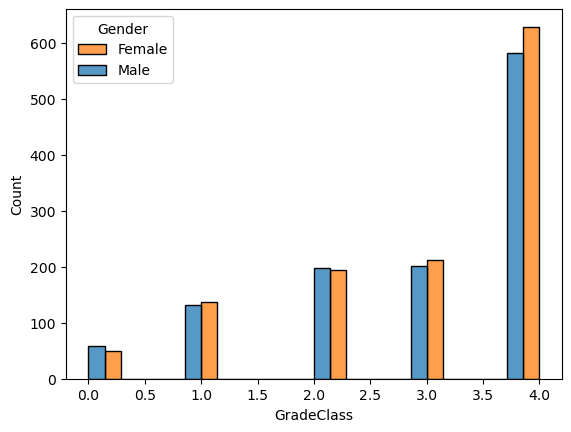

In [5]:
sns.histplot(data=df, x='GradeClass', hue='Gender', multiple='dodge', legend=False)
plt.legend(title='Gender', labels=['Female', 'Male'])

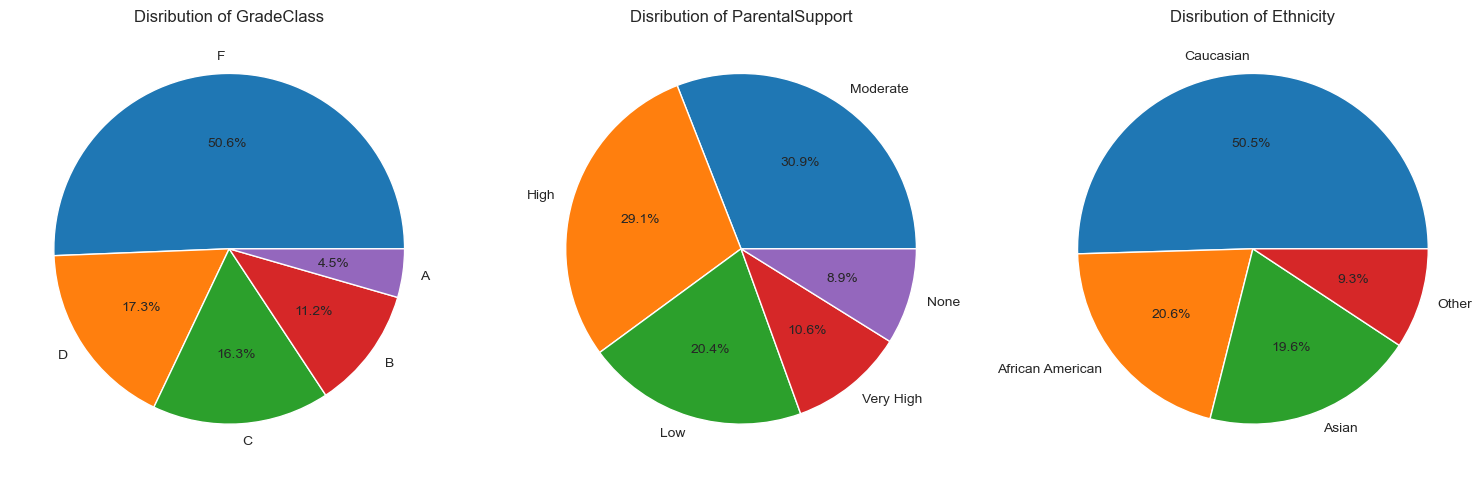

In [6]:
feature_df = df[['GradeClass', 'ParentalSupport', 'Ethnicity']].copy()

# Mapping all the target features to their actual values
feature_df['GradeClass'] = feature_df['GradeClass'].replace({0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'F',})
feature_df['ParentalSupport'] = feature_df['ParentalSupport'].replace({0: 'None', 1: 'Low', 2: 'Moderate', 3: 'High', 4: 'Very High'})
feature_df['Ethnicity'] = feature_df['Ethnicity'].replace({0: 'Caucasian', 1: 'African American', 2: 'Asian', 3: 'Other'})

sns.set_style('whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
axes.flatten()

for i, feature in enumerate(feature_df.columns):
    feature_counts = feature_df[feature].value_counts()
    axes[i].pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%')
    axes[i].set_title(f'Disribution of {feature}')

plt.tight_layout()

<Axes: xlabel='StudyTimeWeekly', ylabel='GPA'>

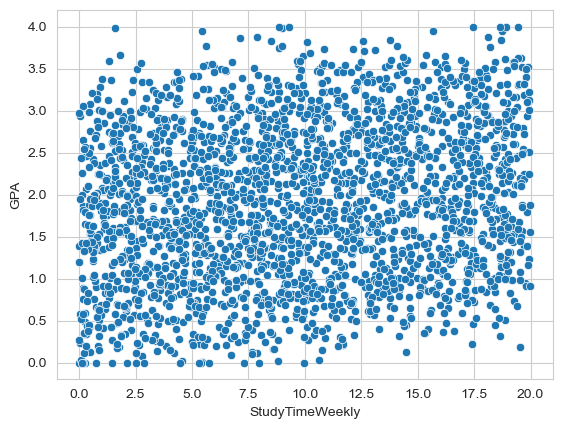

In [7]:
sns.scatterplot(data=df, x='StudyTimeWeekly', y='GPA') 

## Support vector machine
---

### Preprocessing

In [8]:
df.drop('StudentID', axis=1, inplace=True)

# I dropped Age because it didn't make sence to me, also GPA has a straight formula to converto to grade.
X, y = df.drop(['Age', 'GPA', 'GradeClass'], axis=1), df['GradeClass'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Training our model and evaluating it

In [9]:
model = svm.SVC(kernel='rbf')
model.fit(X_train, y_train)

SVC()

In [10]:
y_hat = model.predict(X_test)

print(classification_report(y_test, y_hat, zero_division=1))

              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00        22
         1.0       0.46      0.51      0.48        45
         2.0       0.58      0.55      0.56        77
         3.0       0.59      0.53      0.56        87
         4.0       0.85      0.95      0.90       248

    accuracy                           0.72       479
   macro avg       0.70      0.51      0.50       479
weighted avg       0.73      0.72      0.70       479



### Plotting confusion matrix

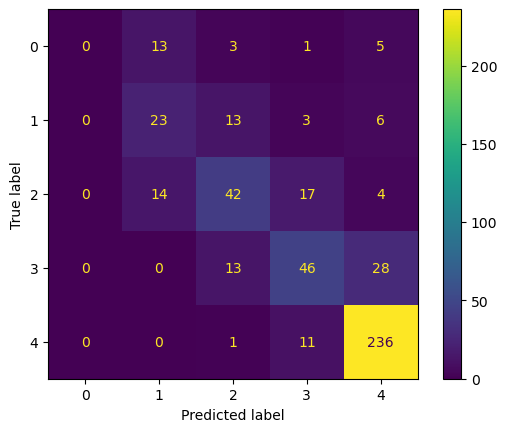

In [11]:
cm = confusion_matrix(y_test, y_hat)

plt.style.use('default')
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()

---
<center>
    <h3>
        <i>
            This concludes the notebook. Feel free to reach out with any questions or suggestions!
        </i>
    </h3>
</center>